In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tech = pd.read_csv('/Users/annamezhlauk/Desktop/ECO225Project/Data/Tech_salaries.csv')

display(tech.head())

print(tech.dtypes)

missing = tech.isnull().sum()

print(missing)

tech.describe()

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


index                          int64
salary_id                      int64
employer_name                 object
location_name                 object
location_state                object
location_country              object
location_latitude            float64
location_longitude           float64
job_title                     object
job_title_category            object
job_title_rank                object
total_experience_years       float64
employer_experience_years    float64
annual_base_pay              float64
signing_bonus                float64
annual_bonus                 float64
stock_value_bonus             object
comments                      object
submitted_at                  object
dtype: object
index                           0
salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title  

,index,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655.000000,1655.000000,792.000000,792.000000,1608.000000,1608.000000,1.651000e+03,1.332000e+03,1.336000e+03
mean,827.000000,1684.100906,37.754394,-64.712273,6.756113,2.656163,6.325004e+06,2.240563e+04,1.177552e+04
std,477.901664,932.901390,16.740905,67.090364,5.687004,3.301834,2.461353e+08,3.097990e+05,6.921569e+04
min,0.000000,1.000000,-41.000000,-123.270000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,413.500000,897.000000,37.410000,-102.702500,3.000000,1.000000,6.100000e+04,0.000000e+00,0.000000e+00
50%,827.000000,1711.000000,38.580000,-95.000000,5.000000,2.000000,9.948000e+04,0.000000e+00,5.000000e+02
75%,1240.500000,2477.000000,45.440000,-64.562500,10.000000,3.000000,1.300000e+05,5.000000e+03,1.000000e+04
max,1654.000000,3298.000000,65.000000,174.000000,56.000000,58.000000,1.000000e+10,8.999999e+06,2.000000e+06


In [3]:
non_interval = ['index', 'salary_id', 'location_latitude', 'location_longitude']

tech[non_interval] = tech[non_interval].astype(str)

tech.describe(percentiles=None, include=None, exclude=None)

print(tech.dtypes)

index                         object
salary_id                     object
employer_name                 object
location_name                 object
location_state                object
location_country              object
location_latitude             object
location_longitude            object
job_title                     object
job_title_category            object
job_title_rank                object
total_experience_years       float64
employer_experience_years    float64
annual_base_pay              float64
signing_bonus                float64
annual_bonus                 float64
stock_value_bonus             object
comments                      object
submitted_at                  object
dtype: object


In [4]:
#tech['annual_base_pay'] = tech['annual_base_pay']/1000
#tech['signing_bonus'] = tech['signing_bonus']/1000
#tech['annual_bonus'] = tech['annual_bonus']/1000

#tech.rename(columns={'signing_bonus': 'signing_bonus_1000s', 'annual_base_pay': 'annual_base_pay_1000s', 'annual_bonus': 'annual_bonus_1000s'}, inplace=True)
#tech.head()

#print(tech.dtypes)

index                         object
salary_id                     object
employer_name                 object
location_name                 object
location_state                object
location_country              object
location_latitude             object
location_longitude            object
job_title                     object
job_title_category            object
job_title_rank                object
total_experience_years       float64
employer_experience_years    float64
annual_base_pay_1000s        float64
signing_bonus_1000s          float64
annual_bonus_1000s           float64
stock_value_bonus             object
comments                      object
submitted_at                  object
dtype: object


In [5]:
print(tech['annual_base_pay_1000s'].isnull().sum())
print(tech['annual_base_pay_1000s'].value_counts().get(0,0))

4
3


In [20]:
print(tech.describe())

# Trying to figure out why my histogram looks so odd with just one bin (0-0.1)

tech_sorted = tech.sort_values(by='annual_base_pay_1000s', ascending=True)

print(tech_sorted)


       total_experience_years  employer_experience_years  \
count             1608.000000                1608.000000   
mean                 6.756113                   2.656163   
std                  5.687004                   3.301834   
min                  0.000000                   0.000000   
25%                  3.000000                   1.000000   
50%                  5.000000                   2.000000   
75%                 10.000000                   3.000000   
max                 56.000000                  58.000000   

       annual_base_pay_1000s  signing_bonus_1000s  annual_bonus_1000s  
count           1.651000e+03          1332.000000         1336.000000  
mean            6.325004e+03            22.405627           11.775525  
std             2.461353e+05           309.799006           69.215695  
min             0.000000e+00             0.000000            0.000000  
25%             6.100000e+01             0.000000            0.000000  
50%             9.948000e+0

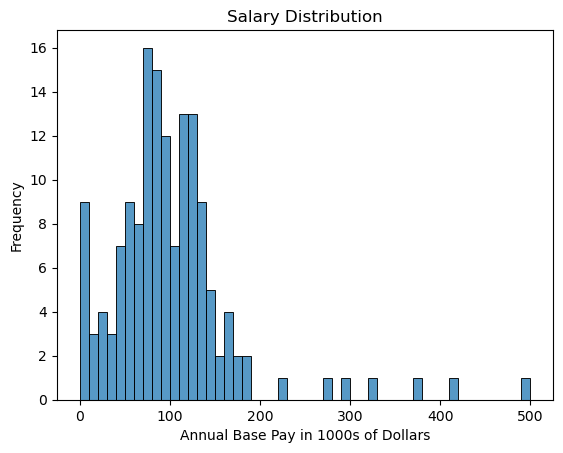

In [30]:
lalala = tech.head(150)

sns.histplot(lalala['annual_base_pay_1000s'], bins =50, kde=False)
plt.title('Salary Distribution')
plt.xlabel('Annual Base Pay in 1000s of Dollars')
plt.ylabel('Frequency')
plt.show()

In [8]:
tech.head()

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay_1000s,signing_bonus_1000s,annual_bonus_1000s,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125.0,5.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.2,senior developer,Software,Senior,15.0,8.0,65.0,NaN,5.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86.0,5.0,6.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,NaN,NaN,nan,nan,mts,Other,NaN,4.0,0.0,105.0,5.0,8.5,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,NaN,NaN,nan,nan,software engineer,Software,NaN,4.0,3.0,110.0,5.0,7.0,150000,NaN,3/21/16 13:02
